[*********************100%%**********************]  1 of 1 completed
                   %K         %D  Signal  Position
Date                                              
2020-10-22  32.982394  29.083792     1.0       1.0
2020-10-27  29.562520  25.322396     1.0       1.0
2020-10-30  10.289186   6.128674     1.0       1.0
2020-11-11  51.805435  50.606355     1.0       1.0
2020-11-17  75.401151  51.645055     1.0       1.0
2020-11-23  96.806960  90.633281     1.0       1.0
2020-12-01  88.823118  87.806177     1.0       1.0
2020-12-03  93.004748  87.639463     1.0       1.0
2020-12-14  88.690290  81.045987     1.0       1.0
2020-12-17  97.517194  83.665351     1.0       1.0
2020-12-24  74.172220  64.529239     1.0       1.0
2021-01-05  93.275510  90.673012     1.0       1.0
2021-01-07  99.531490  94.048091     1.0       1.0
2021-01-12  87.031021  86.085017     1.0       1.0
2021-01-19  82.596202  80.320217     1.0       1.0
2021-01-25  89.183235  82.044015     1.0       1.0
2021-02-01  4

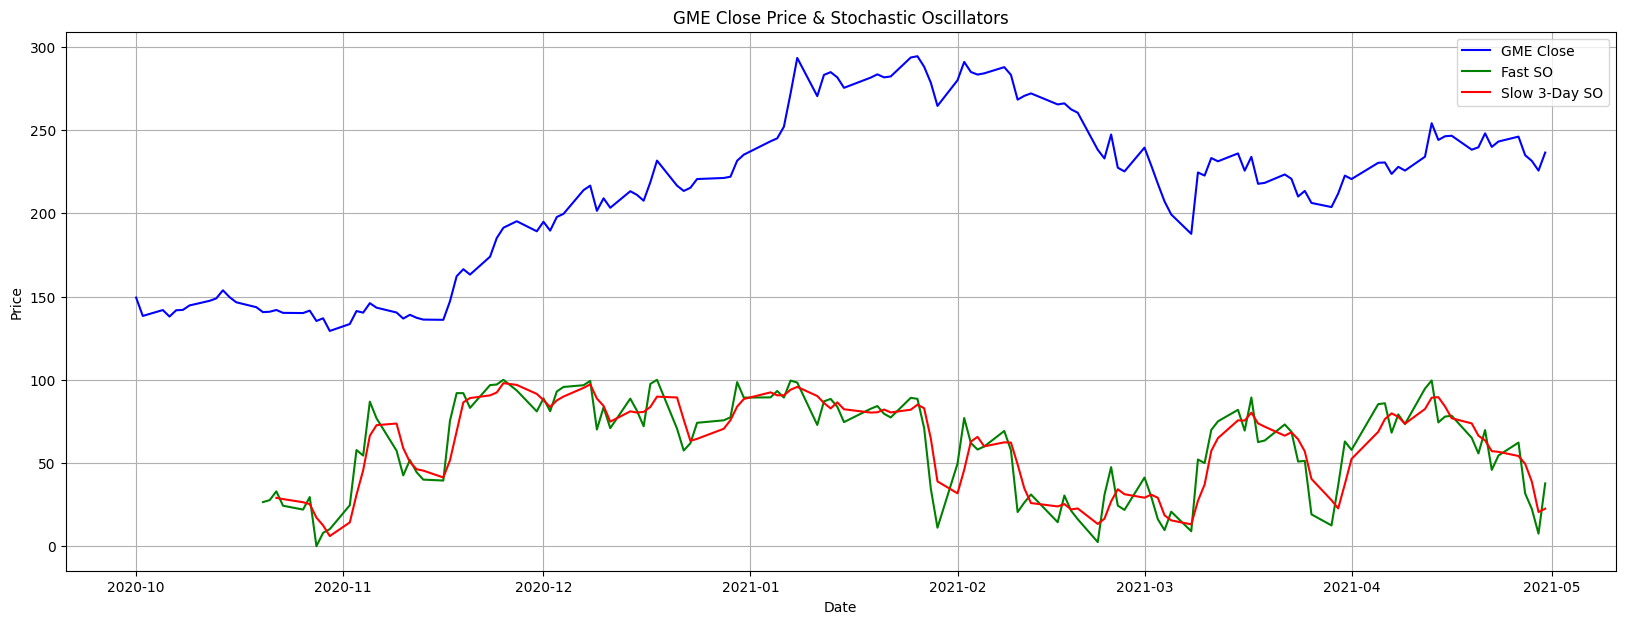

NameError: name 'edited' is not defined

In [2]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#defining the ticker and daterange
ticker1 = "TSLA"
start1 = dt.date(2020, 10, 1)
end1 = dt.date(2021, 5, 1)
ticker1_data = yf.download(ticker1, start = start1, end = end1)
ticker1_data
#fast oscillator (%K) is the value of, slow oscillator (%D) has smoothing of 3 days, trade signals generated when the fast crosses through the slow
#SO usually calculated over a period of 14 days
SO_window = 14
slow_window = 3
#no fast window because it's literally 1 day
#SO calculations
ticker1_data['Lowest'] = ticker1_data['Low'].rolling(window=SO_window).min()
ticker1_data['Highest'] = ticker1_data['High'].rolling(window=SO_window).max()
ticker1_data['%K'] = ((ticker1_data['Close'] - ticker1_data['Lowest']) / (ticker1_data['Highest'] - ticker1_data['Lowest'])) * 100
ticker1_data['%D'] = ticker1_data['%K'].rolling(window=slow_window).mean()
#detect crossovers
crossovers = pd.DataFrame(index=ticker1_data.index)
crossovers['%K'] = ticker1_data['%K']
crossovers['%D'] = ticker1_data['%D']
crossovers['Signal'] = 0.0
crossovers['Signal'] = np.where(crossovers['%K'] > crossovers['%D'], 1.0, 0.0)
# Find crossover points
crossovers['Position'] = crossovers['Signal'].diff()
# Show the dates of the crossovers
print(crossovers.loc[crossovers['Position'] == 1])  # Bullish crossovers
print(crossovers.loc[crossovers['Position'] == -1])  # Bearish crossovers
# Plot the closing price along with the moving averages
plt.figure(figsize=(20, 7))  # Set the figure size
plt.plot(ticker1_data['Close'], label='GME Close', color='blue')  # Plot the closing price
plt.plot(ticker1_data['%K'], label=f'Fast SO', color='green')  # Plot the fast SO
plt.plot(ticker1_data['%D'], label=f'Slow {slow_window}-Day SO', color='red')  # Plot the slow SO
# Add title and labels
plt.title('GME Close Price & Stochastic Oscillators')
plt.xlabel('Date')
plt.ylabel('Price')
# Show the legend
plt.legend()
# Show the grid
plt.grid(True)
# Show the plot
plt.show() (edited) 